In [1]:
import numpy as np
import os
import pandas as pd
import cv2
import random
from IPython.display import display, HTML 
import matplotlib.pyplot as plt

from albumentations import (VerticalFlip, HorizontalFlip, Flip, RandomRotate90, Rotate, ShiftScaleRotate, CenterCrop, OpticalDistortion, GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded 
                           )

WORK_SPACE = "/home/olle/PycharmProjects/LODE/workspace"
DATA_EXT = "feature_segmentation/segmentation/data/train_data/hq_examples"
DATA_PATH = os.path.join(WORK_SPACE, DATA_EXT)

IMG_PATH = os.path.join(DATA_PATH, "images")
MASK_PATH = os.path.join(DATA_PATH, "masks")

img_ids = os.listdir(IMG_PATH)

In [2]:
def show_img(img, figsize=(4, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img)
    plt.imshow(img)
    

def show_augmentation(img, augmenation, **params):
    params_code = ', '.join(f'{key}={value}' for key, value in params.items())
    if params_code:
      params_code += ', '
    text = HTML(
        'Use this augmentation in your code:'
        '<pre style="display:block; background-color: #eee; margin: 10px; padding: 10px;">'
        f'{augmenation.__class__.__name__}({params_code}p=0.5)'
        '</pre>'
    )
    display(text)
    show_img(img)

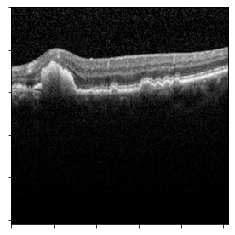

In [27]:
image = cv2.imread(os.path.join(IMG_PATH, img_ids[random.randint(0, len(img_ids))]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))

display(HTML('<h3>Original image</h3>'))
show_img(image)

In [ ]:
### Pixel-level transforms

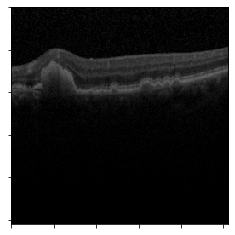

In [37]:
#@title RandomBrightness { run: "auto", vertical-output: true, display-mode: "form" }
alpha = 0.4 #@param {type:"slider", min:0, max:5, step:0.1}
aug = RandomContrast(p=1)
img = aug.apply(image, alpha=alpha)
show_augmentation(img, aug, limit=alpha)

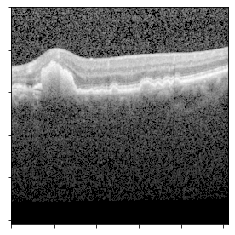

In [32]:
#@title RandomGamma { run: "auto", vertical-output: true, display-mode: "form" }
gamma = 35 #@param {type:"slider", min:0, max:255, step:1}
aug = RandomGamma(p=1)
image_for_augmentation = image.copy()
img = aug.apply(image_for_augmentation, gamma=gamma / 100)
show_augmentation(img, aug, gamma_limit=gamma)

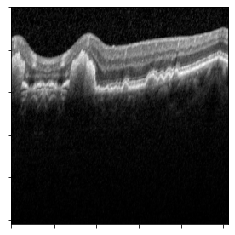

In [33]:
#@title ElasticTransform { run: "auto", vertical-output: true, display-mode: "form" }
alpha = 203 #@param {type:"slider", min:0, max:255, step:1}
alpha_affine = 106 #@param {type:"slider", min:0, max:255, step:1}
sigma = 166 #@param {type:"slider", min:0, max:255, step:1}
aug = ElasticTransform(p=1)
image_for_augmentation = image.copy()
img = aug.apply(image_for_augmentation, alpha=alpha, sigma=sigma, alpha_affine=alpha_affine)
show_augmentation(img, aug, alpha=alpha, sigma=sigma, alpha_affine=alpha_affine)

In [ ]:
### Spatial-level transforms